In [21]:
%load_ext autoreload
%autoreload 2

### sys packages ###
import sys
import os
sys.path.insert(0,os.path.abspath("/eos/home-b/bjlindst/SWAN_projects/lib"))

### data packages ###
import pandas as pd
import numpy as np
import nxcals
import pyspark.sql.functions as F
import pyspark.sql.types as T
import pyspark.sql.session
import json, requests
from nxcals.api.extraction.data.builders import DataQuery

### math functions ###
import math

### disk read/write packages ###
import csv, pickle

### plot packages ###
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib import dates       
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.patches as patches
plt.rc('font',family='serif')  

### own packages ###
import nxcals2 as nx
#import mpchecklist as mp
#from collBPMdict import *
#import fillInfo

### time packages ###
import pytz
from datetime import datetime
import time

### other packages ###
import re
#import imp
#import pylab as pl


from datetime import datetime, timezone, timedelta

import xobjects as xo
import xtrack as xt
import xpart as xp
import xcoll as xc

import pandas as pd
import numpy as np
import scipy.optimize as opt
import scipy.optimize as opt
from scipy.special import erf
from scipy.stats import norm

from matplotlib.ticker import FixedLocator
import matplotlib



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def _to_ts(string, round_seconds=True, unit='s'):
    t = pd.Timestamp(string, unit=unit, tz='CET')
    is_summer_time = t.dst().seconds > 0.1
    if round_seconds:
        t = t.round(freq='s', ambiguous=is_summer_time)
    return t

In [18]:
var = 'BLMTI.05R3.B2E10_TCCS.5R3.B2:LOSS_RS09'
tMin = _to_ts('2025-04-20 14:29:34')
tMax = _to_ts('2025-04-20 14:36:34')

/tmp/ipykernel_1211/2815651366.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  t = t.round(freq='S', ambiguous=is_summer_time)


In [19]:
 df_bpmU0 = nx._build_spark_dataSet(tMin,tMax,var,spark=spark)

25/06/17 17:37:30 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@651b079b{/SQL,null,AVAILABLE,@Spark}
25/06/17 17:37:30 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@66e05ab3{/SQL/json,null,AVAILABLE,@Spark}
25/06/17 17:37:30 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@40404b00{/SQL/execution,null,AVAILABLE,@Spark}
25/06/17 17:37:30 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@5bb581eb{/SQL/execution/json,null,AVAILABLE,@Spark}
25/06/17 17:37:30 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@6f6bd207{/static/sql,null,AVAILABLE,@Spark}


In [28]:
data_bpmU0 = df_bpmU0.toPandas()
data_bpmU0

,nxcals_value,nxcals_entity_id,nxcals_timestamp,nxcals_variable_name
0,0.000021,111189779,1745152174000363525,BLMTI.05R3.B2E10_TCCS.5R3.B2:LOSS_RS09
1,0.000023,111189779,1745152175000363525,BLMTI.05R3.B2E10_TCCS.5R3.B2:LOSS_RS09
2,0.000026,111189779,1745152176000363525,BLMTI.05R3.B2E10_TCCS.5R3.B2:LOSS_RS09
3,0.000026,111189779,1745152177000363525,BLMTI.05R3.B2E10_TCCS.5R3.B2:LOSS_RS09
4,0.000025,111189779,1745152178000363525,BLMTI.05R3.B2E10_TCCS.5R3.B2:LOSS_RS09
...,...,...,...,...
415,0.000015,111189779,1745152589000363525,BLMTI.05R3.B2E10_TCCS.5R3.B2:LOSS_RS09
416,0.000021,111189779,1745152590000363525,BLMTI.05R3.B2E10_TCCS.5R3.B2:LOSS_RS09
417,0.000025,111189779,1745152591000363525,BLMTI.05R3.B2E10_TCCS.5R3.B2:LOSS_RS09
418,0.000023,111189779,1745152592000363525,BLMTI.05R3.B2E10_TCCS.5R3.B2:LOSS_RS09


In [30]:
temp_bpmU0=data_bpmU0[['nxcals_timestamp','nxcals_value']].to_numpy()
temp_bpmU0

array([[1.74515217e+18, 2.07524719e-05],
       [1.74515218e+18, 2.32823181e-05],
       [1.74515218e+18, 2.56436920e-05],
       [1.74515218e+18, 2.55442657e-05],
       [1.74515218e+18, 2.46135254e-05],
       [1.74515218e+18, 2.51244659e-05],
       [1.74515218e+18, 2.82784882e-05],
       [1.74515218e+18, 2.91981812e-05],
       [1.74515218e+18, 2.34839325e-05],
       [1.74515218e+18, 1.89655609e-05],
       [1.74515218e+18, 2.11971283e-05],
       [1.74515219e+18, 2.21444397e-05],
       [1.74515219e+18, 2.68616638e-05],
       [1.74515219e+18, 2.73560333e-05],
       [1.74515219e+18, 2.22217712e-05],
       [1.74515219e+18, 2.62043457e-05],
       [1.74515219e+18, 3.26090546e-05],
       [1.74515219e+18, 2.52625580e-05],
       [1.74515219e+18, 2.77399292e-05],
       [1.74515219e+18, 2.52017975e-05],
       [1.74515219e+18, 2.22631989e-05],
       [1.74515220e+18, 2.38899231e-05],
       [1.74515220e+18, 3.11425171e-05],
       [1.74515220e+18, 2.94522705e-05],
       [1.745152

In [32]:
sortData_bpmU0=temp_bpmU0[temp_bpmU0[:, 0].argsort()]
sortData_bpmU0 

array([[1.74515217e+18, 2.07524719e-05],
       [1.74515218e+18, 2.32823181e-05],
       [1.74515218e+18, 2.56436920e-05],
       [1.74515218e+18, 2.55442657e-05],
       [1.74515218e+18, 2.46135254e-05],
       [1.74515218e+18, 2.51244659e-05],
       [1.74515218e+18, 2.82784882e-05],
       [1.74515218e+18, 2.91981812e-05],
       [1.74515218e+18, 2.34839325e-05],
       [1.74515218e+18, 1.89655609e-05],
       [1.74515218e+18, 2.11971283e-05],
       [1.74515219e+18, 2.21444397e-05],
       [1.74515219e+18, 2.68616638e-05],
       [1.74515219e+18, 2.73560333e-05],
       [1.74515219e+18, 2.22217712e-05],
       [1.74515219e+18, 2.62043457e-05],
       [1.74515219e+18, 3.26090546e-05],
       [1.74515219e+18, 2.52625580e-05],
       [1.74515219e+18, 2.77399292e-05],
       [1.74515219e+18, 2.52017975e-05],
       [1.74515219e+18, 2.22631989e-05],
       [1.74515220e+18, 2.38899231e-05],
       [1.74515220e+18, 3.11425171e-05],
       [1.74515220e+18, 2.94522705e-05],
       [1.745152

In [34]:
bpmData1=[sortData_bpmU0[:,0],sortData_bpmU0[:,1]]
bpmData1

[array([1.74515217e+18, 1.74515218e+18, 1.74515218e+18, 1.74515218e+18,
        1.74515218e+18, 1.74515218e+18, 1.74515218e+18, 1.74515218e+18,
        1.74515218e+18, 1.74515218e+18, 1.74515218e+18, 1.74515219e+18,
        1.74515219e+18, 1.74515219e+18, 1.74515219e+18, 1.74515219e+18,
        1.74515219e+18, 1.74515219e+18, 1.74515219e+18, 1.74515219e+18,
        1.74515219e+18, 1.74515220e+18, 1.74515220e+18, 1.74515220e+18,
        1.74515220e+18, 1.74515220e+18, 1.74515220e+18, 1.74515220e+18,
        1.74515220e+18, 1.74515220e+18, 1.74515220e+18, 1.74515221e+18,
        1.74515221e+18, 1.74515221e+18, 1.74515221e+18, 1.74515221e+18,
        1.74515221e+18, 1.74515221e+18, 1.74515221e+18, 1.74515221e+18,
        1.74515221e+18, 1.74515222e+18, 1.74515222e+18, 1.74515222e+18,
        1.74515222e+18, 1.74515222e+18, 1.74515222e+18, 1.74515222e+18,
        1.74515222e+18, 1.74515222e+18, 1.74515222e+18, 1.74515223e+18,
        1.74515223e+18, 1.74515223e+18, 1.74515223e+18, 1.745152

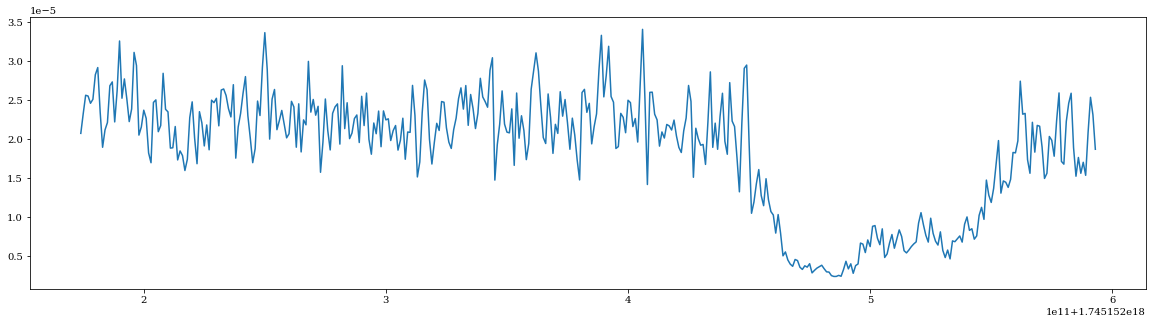

In [35]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(bpmData1[0], bpmData1[1])

In [37]:
tMin = _to_ts('2025-05-15 18:32:00')
tMax = _to_ts('2025-05-15 18:33:00')

#var = 'BLMTI.05R7.B2I10_TCPCH.A5R7.B2:LOSS_RS09'
var = "hitMapPix"

/tmp/ipykernel_1211/2815651366.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  t = t.round(freq='S', ambiguous=is_summer_time)


In [38]:
df_bpmU0 = nx._build_spark_dataSet(tMin,tMax,var,spark=spark)
df_bpmU0

DataFrame[nxcals_value: struct<elements:array<int>,dimensions:array<int>>, nxcals_entity_id: bigint, nxcals_timestamp: bigint, nxcals_variable_name: string]

In [39]:
data_bpmU0 = df_bpmU0.toPandas()
data_bpmU0

25/06/17 18:01:59 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 1 for reason Container from a bad node: container_e93_1740382629255_142089_01_000002 on host: ithdp-nxcals8011.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 18:01:58.929]Container killed on request. Exit code is 143
[2025-06-17 18:01:58.950]Container exited with a non-zero exit code 143. 
[2025-06-17 18:01:58.951]Killed by external signal
.
25/06/17 18:01:59 ERROR YarnScheduler: Lost executor 1 on ithdp-nxcals8011.cern.ch: Container from a bad node: container_e93_1740382629255_142089_01_000002 on host: ithdp-nxcals8011.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 18:01:58.929]Container killed on request. Exit code is 143
[2025-06-17 18:01:58.950]Container exited with a non-zero exit code 143. 
[2025-06-17 18:01:58.951]Killed by external signal
.
25/06/17 18:01:59 WARN TaskSetManager: Lost task 1.0 in stage 4.0 (TID 11) (ithdp-nxcals8011.cern.ch executor 1): ExecutorLostF

25/06/17 18:04:39 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 4 for reason Container from a bad node: container_e93_1740382629255_142089_01_000005 on host: ithdp-nxcals8014.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 18:04:39.116]Container killed on request. Exit code is 143
[2025-06-17 18:04:39.136]Container exited with a non-zero exit code 143. 
[2025-06-17 18:04:39.137]Killed by external signal
.
25/06/17 18:04:39 ERROR YarnScheduler: Lost executor 4 on ithdp-nxcals8014.cern.ch: Container from a bad node: container_e93_1740382629255_142089_01_000005 on host: ithdp-nxcals8014.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 18:04:39.116]Container killed on request. Exit code is 143
[2025-06-17 18:04:39.136]Container exited with a non-zero exit code 143. 
[2025-06-17 18:04:39.137]Killed by external signal
.
25/06/17 18:04:39 WARN TaskSetManager: Lost task 0.3 in stage 4.0 (TID 23) (ithdp-nxcals8014.cern.ch executor 4): ExecutorLostF

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_nxcals_pro/x86_64-el9-gcc13-opt/python/pyspark/sql/pandas/conversion.py:198: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true, but has reached the error below and can not continue. Note that 'spark.sql.execution.arrow.pyspark.fallback.enabled' does not have an effect on failures in the middle of computation.
  An error occurred while calling o134.getResult.
: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:98)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:94)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorI

Py4JJavaError: An error occurred while calling o134.getResult.
: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:98)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:94)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 4.0 failed 4 times, most recent failure: Lost task 0.3 in stage 4.0 (TID 23) (ithdp-nxcals8014.cern.ch executor 4): ExecutorLostFailure (executor 4 exited caused by one of the running tasks) Reason: Container from a bad node: container_e93_1740382629255_142089_01_000005 on host: ithdp-nxcals8014.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 18:04:39.116]Container killed on request. Exit code is 143
[2025-06-17 18:04:39.136]Container exited with a non-zero exit code 143. 
[2025-06-17 18:04:39.137]Killed by external signal
.
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2488)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$5(Dataset.scala:4263)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$2(Dataset.scala:4267)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$2$adapted(Dataset.scala:4243)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4323)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4321)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4321)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$1(Dataset.scala:4243)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$1$adapted(Dataset.scala:4242)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$2(SocketAuthServer.scala:140)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$1(SocketAuthServer.scala:142)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$1$adapted(SocketAuthServer.scala:137)
	at org.apache.spark.security.SocketFuncServer.handleConnection(SocketAuthServer.scala:114)
	at org.apache.spark.security.SocketFuncServer.handleConnection(SocketAuthServer.scala:108)
	at org.apache.spark.security.SocketAuthServer$$anon$1.$anonfun$run$4(SocketAuthServer.scala:69)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:69)


In [ ]:
temp_bpmU0=data_bpmU0[['nxcals_timestamp','nxcals_value']].to_numpy()
temp_bpmU0

In [ ]:
sortData_bpmU0=temp_bpmU0[temp_bpmU0[:, 0].argsort()]
sortData_bpmU0

In [ ]:
bpmData1=[sortData_bpmU0[:,0],sortData_bpmU0[:,1]]
bpmData1